# Import Libraries

In [254]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [255]:
pd.set_option('display.max_columns',50)

# Getting Dataset

In [256]:
data=pd.read_csv('/Users/sasikumar/anu/project/Dataset.csv')
data.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


In [257]:
data.shape

(25000, 24)

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

# Data Preprocessing 


# Handling missing values

In [259]:
data.drop(['Ware_house_ID','WH_Manager_ID'],axis=1,inplace=True)

In [260]:
data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


In [261]:
data.isnull().sum()*100/len(data)

Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

In [262]:
data.drop(['wh_est_year'],axis=1,inplace=True)

In [263]:
data.workers_num.fillna(data.workers_num.mean(),inplace=True)

In [264]:
data.approved_wh_govt_certificate.fillna(data.approved_wh_govt_certificate.mode()[0],inplace=True)

In [265]:
data.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

# Checking Duplicates

In [266]:
data.duplicated().sum()

0

# Encoding

In [267]:
data.head(2)

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,4,0,A,3,17,5074


In [268]:
data['WH_regional_zone']=data['WH_regional_zone'].apply(lambda x:x[-1])

In [269]:
data.WH_regional_zone=pd.to_numeric(data.WH_regional_zone)

In [270]:
data.head(2)

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,6,3,1,2,4651,Rented,24,0,1,1,91,29.0,13,0,A,5,15,17115
1,Rural,Large,North,5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,4,0,A,3,17,5074


In [271]:
obj_types_features=data.select_dtypes(include='object')
obj_types_features.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [272]:
 obj_list = ['Location_type', 'WH_capacity_size', 'zone', 'wh_owner_type',
       'approved_wh_govt_certificate']

In [273]:
obj_list

['Location_type',
 'WH_capacity_size',
 'zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

In [274]:
data1=pd.get_dummies(data,columns=obj_list,prefix=obj_list,drop_first=True)

In [275]:
data1.head()

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,6,3,1,2,4651,24,0,1,1,91,29.0,13,0,5,15,17115,1,0,1,0,0,1,1,0,0,0,0
1,5,0,0,4,6217,47,0,0,1,210,31.0,4,0,3,17,5074,0,0,0,1,0,0,0,0,0,0,0
2,2,1,0,4,4306,64,0,0,0,161,37.0,17,0,6,22,23137,0,1,0,0,1,0,0,0,0,0,0
3,3,7,4,2,6000,50,0,0,0,103,21.0,17,1,3,27,22115,0,1,0,1,0,0,1,1,0,0,0
4,5,3,1,2,4740,42,1,0,1,112,25.0,18,0,6,24,24071,0,0,0,1,0,0,0,0,0,0,1


In [276]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   WH_regional_zone                 25000 non-null  int64  
 1   num_refill_req_l3m               25000 non-null  int64  
 2   transport_issue_l1y              25000 non-null  int64  
 3   Competitor_in_mkt                25000 non-null  int64  
 4   retail_shop_num                  25000 non-null  int64  
 5   distributor_num                  25000 non-null  int64  
 6   flood_impacted                   25000 non-null  int64  
 7   flood_proof                      25000 non-null  int64  
 8   electric_supply                  25000 non-null  int64  
 9   dist_from_hub                    25000 non-null  int64  
 10  workers_num                      25000 non-null  float64
 11  storage_issue_reported_l3m       25000 non-null  int64  
 12  temp_reg_mach     

In [277]:
 data1.shape

(25000, 27)

# Outliers

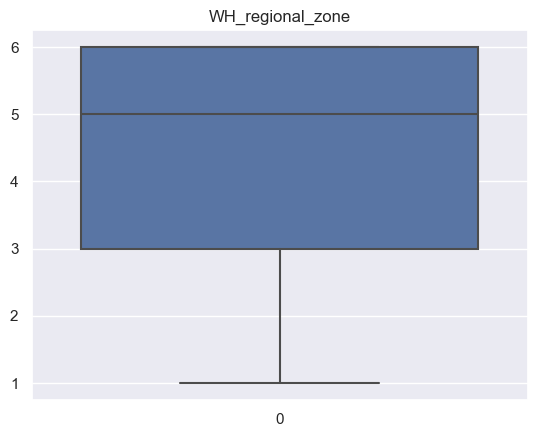

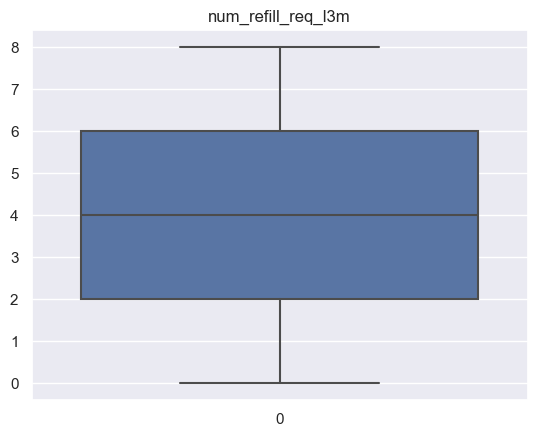

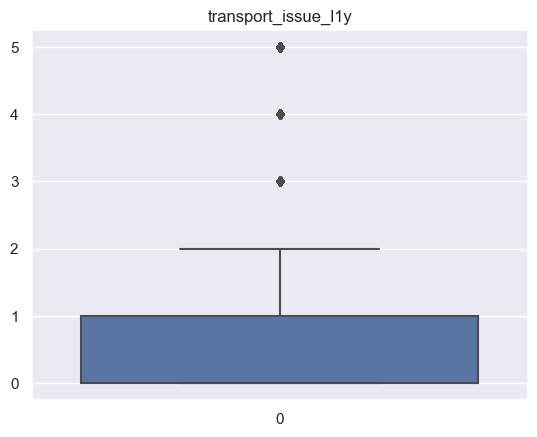

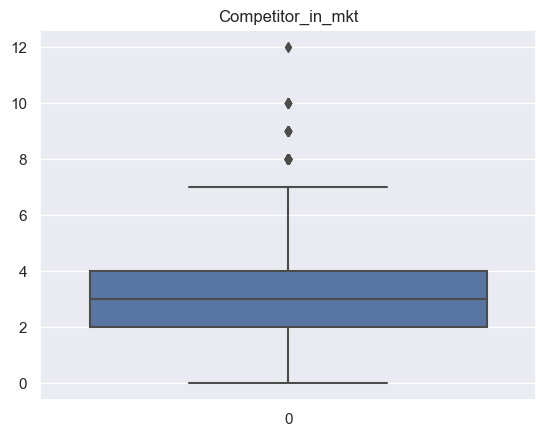

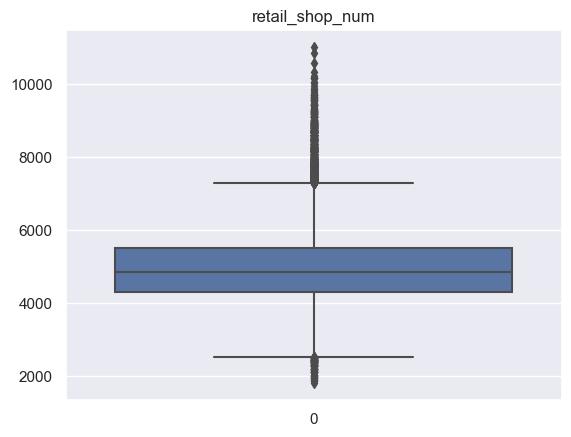

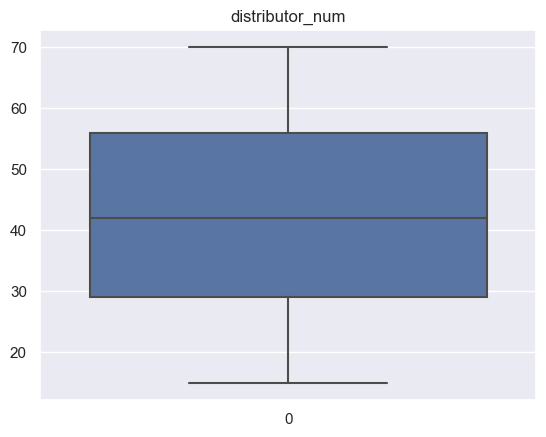

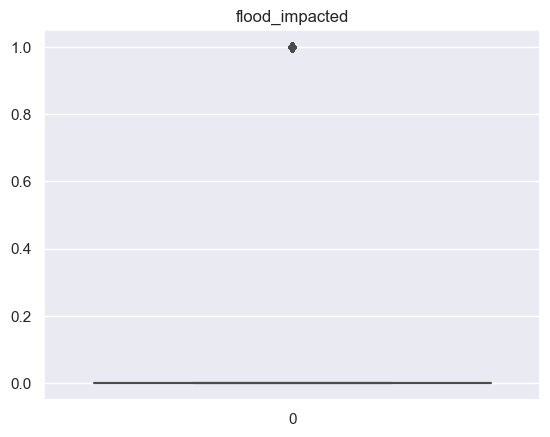

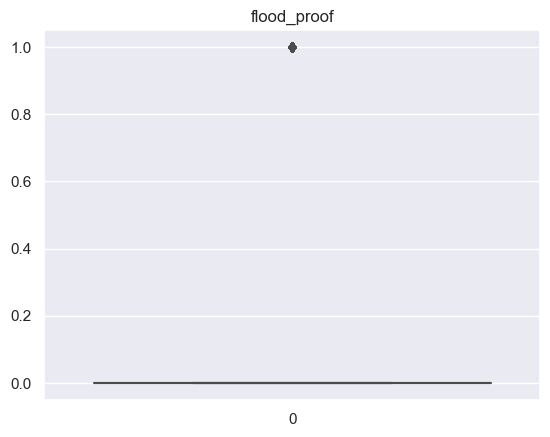

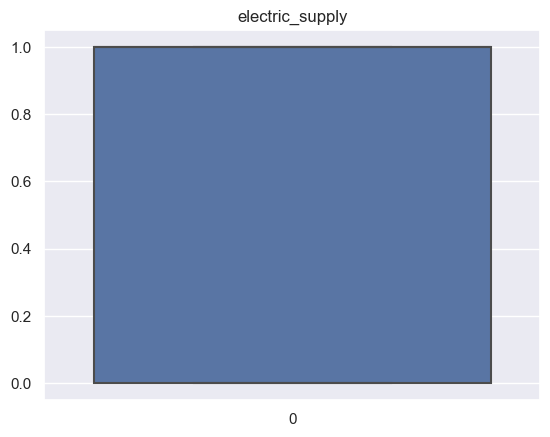

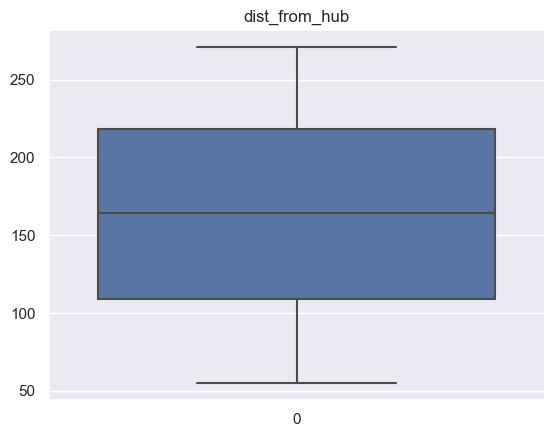

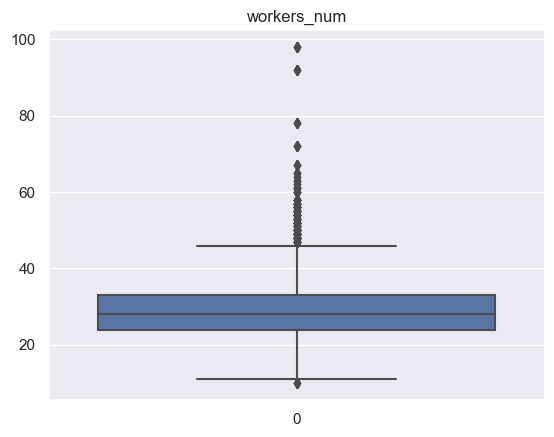

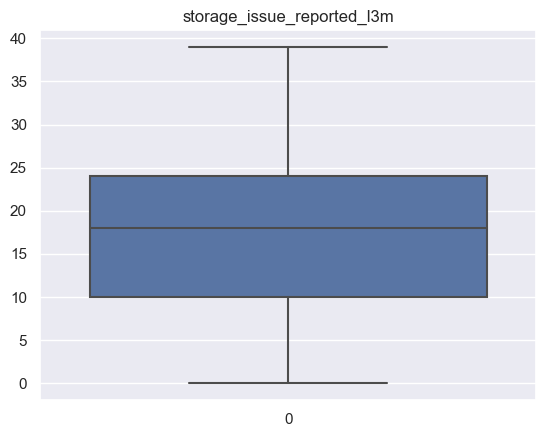

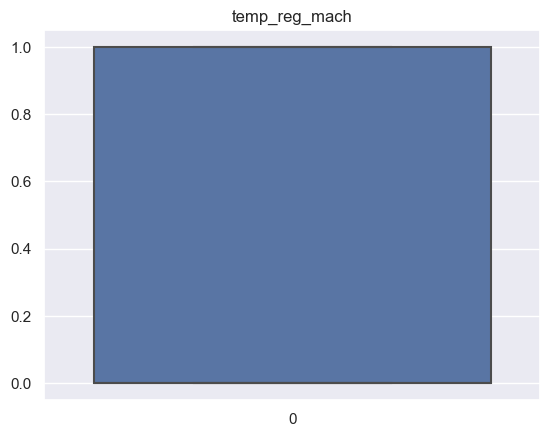

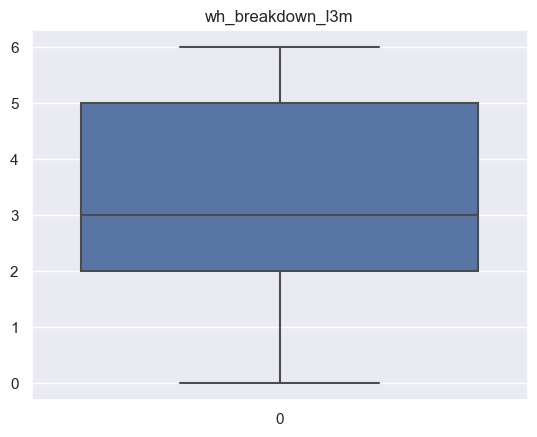

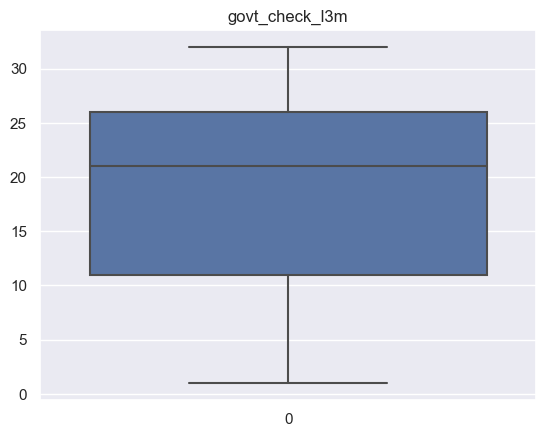

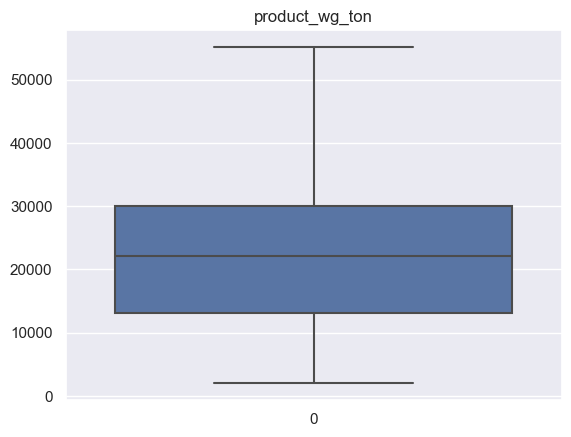

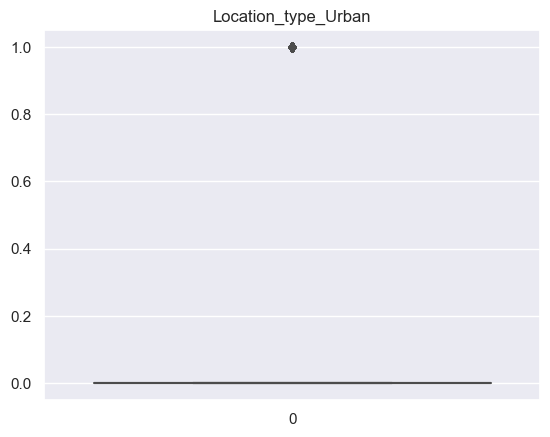

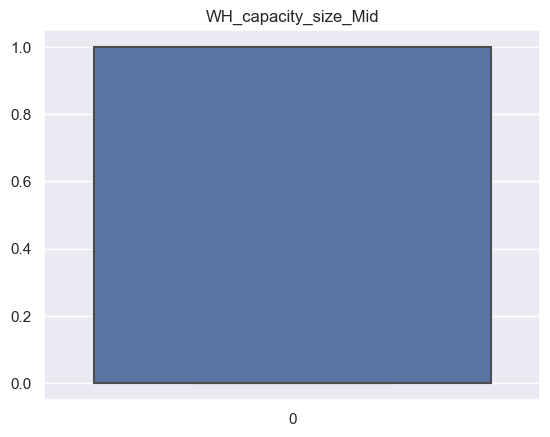

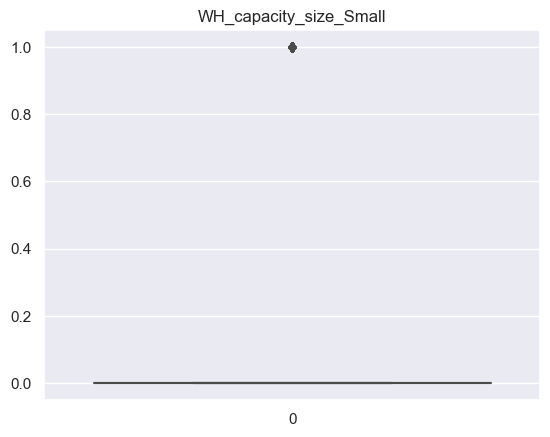

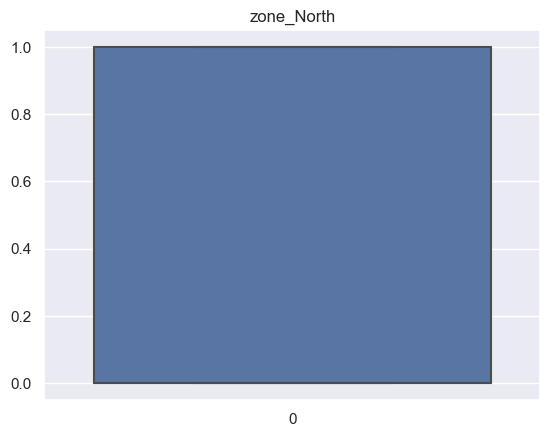

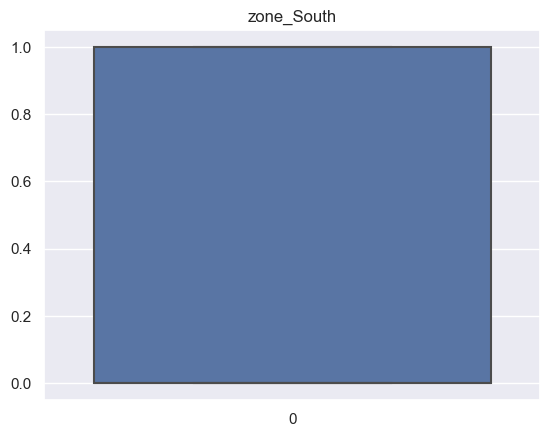

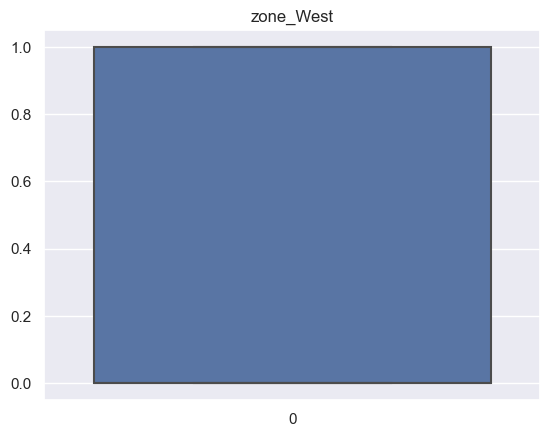

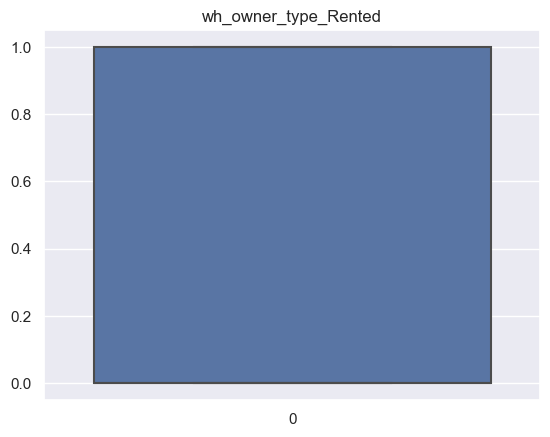

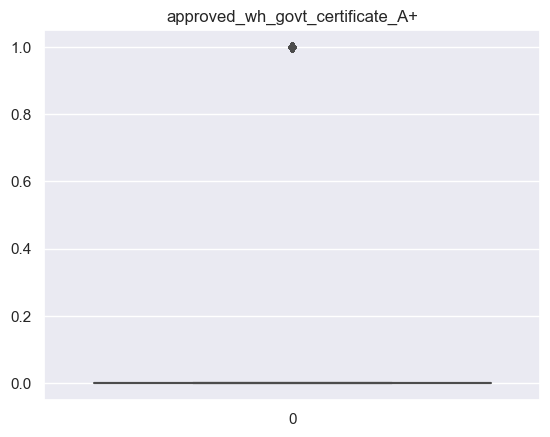

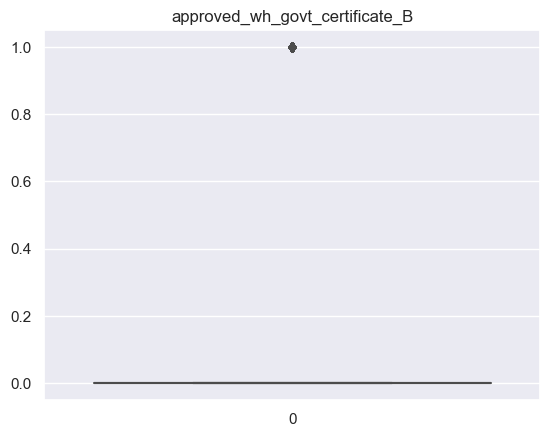

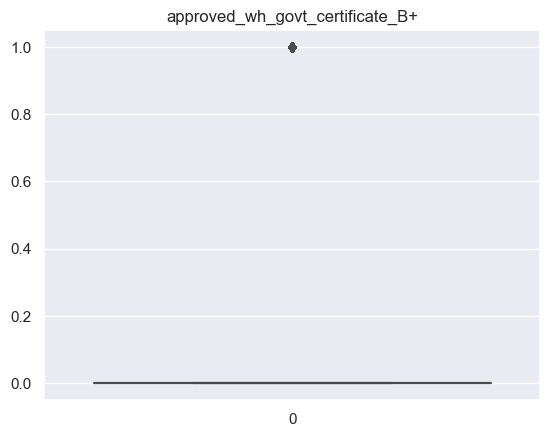

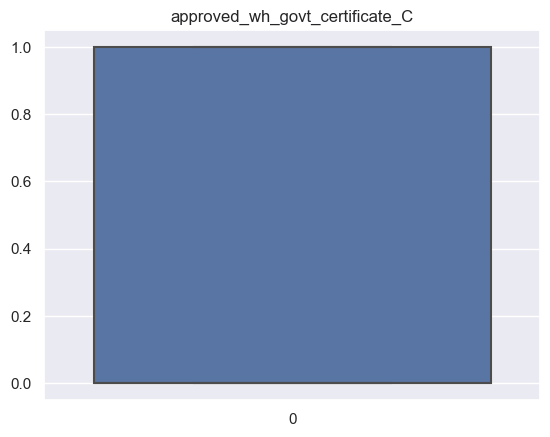

In [278]:
for i in data1.columns:
    sns.boxplot(data1[i])
    plt.title(i)
    plt.show()

In [279]:
#multicollinearity check

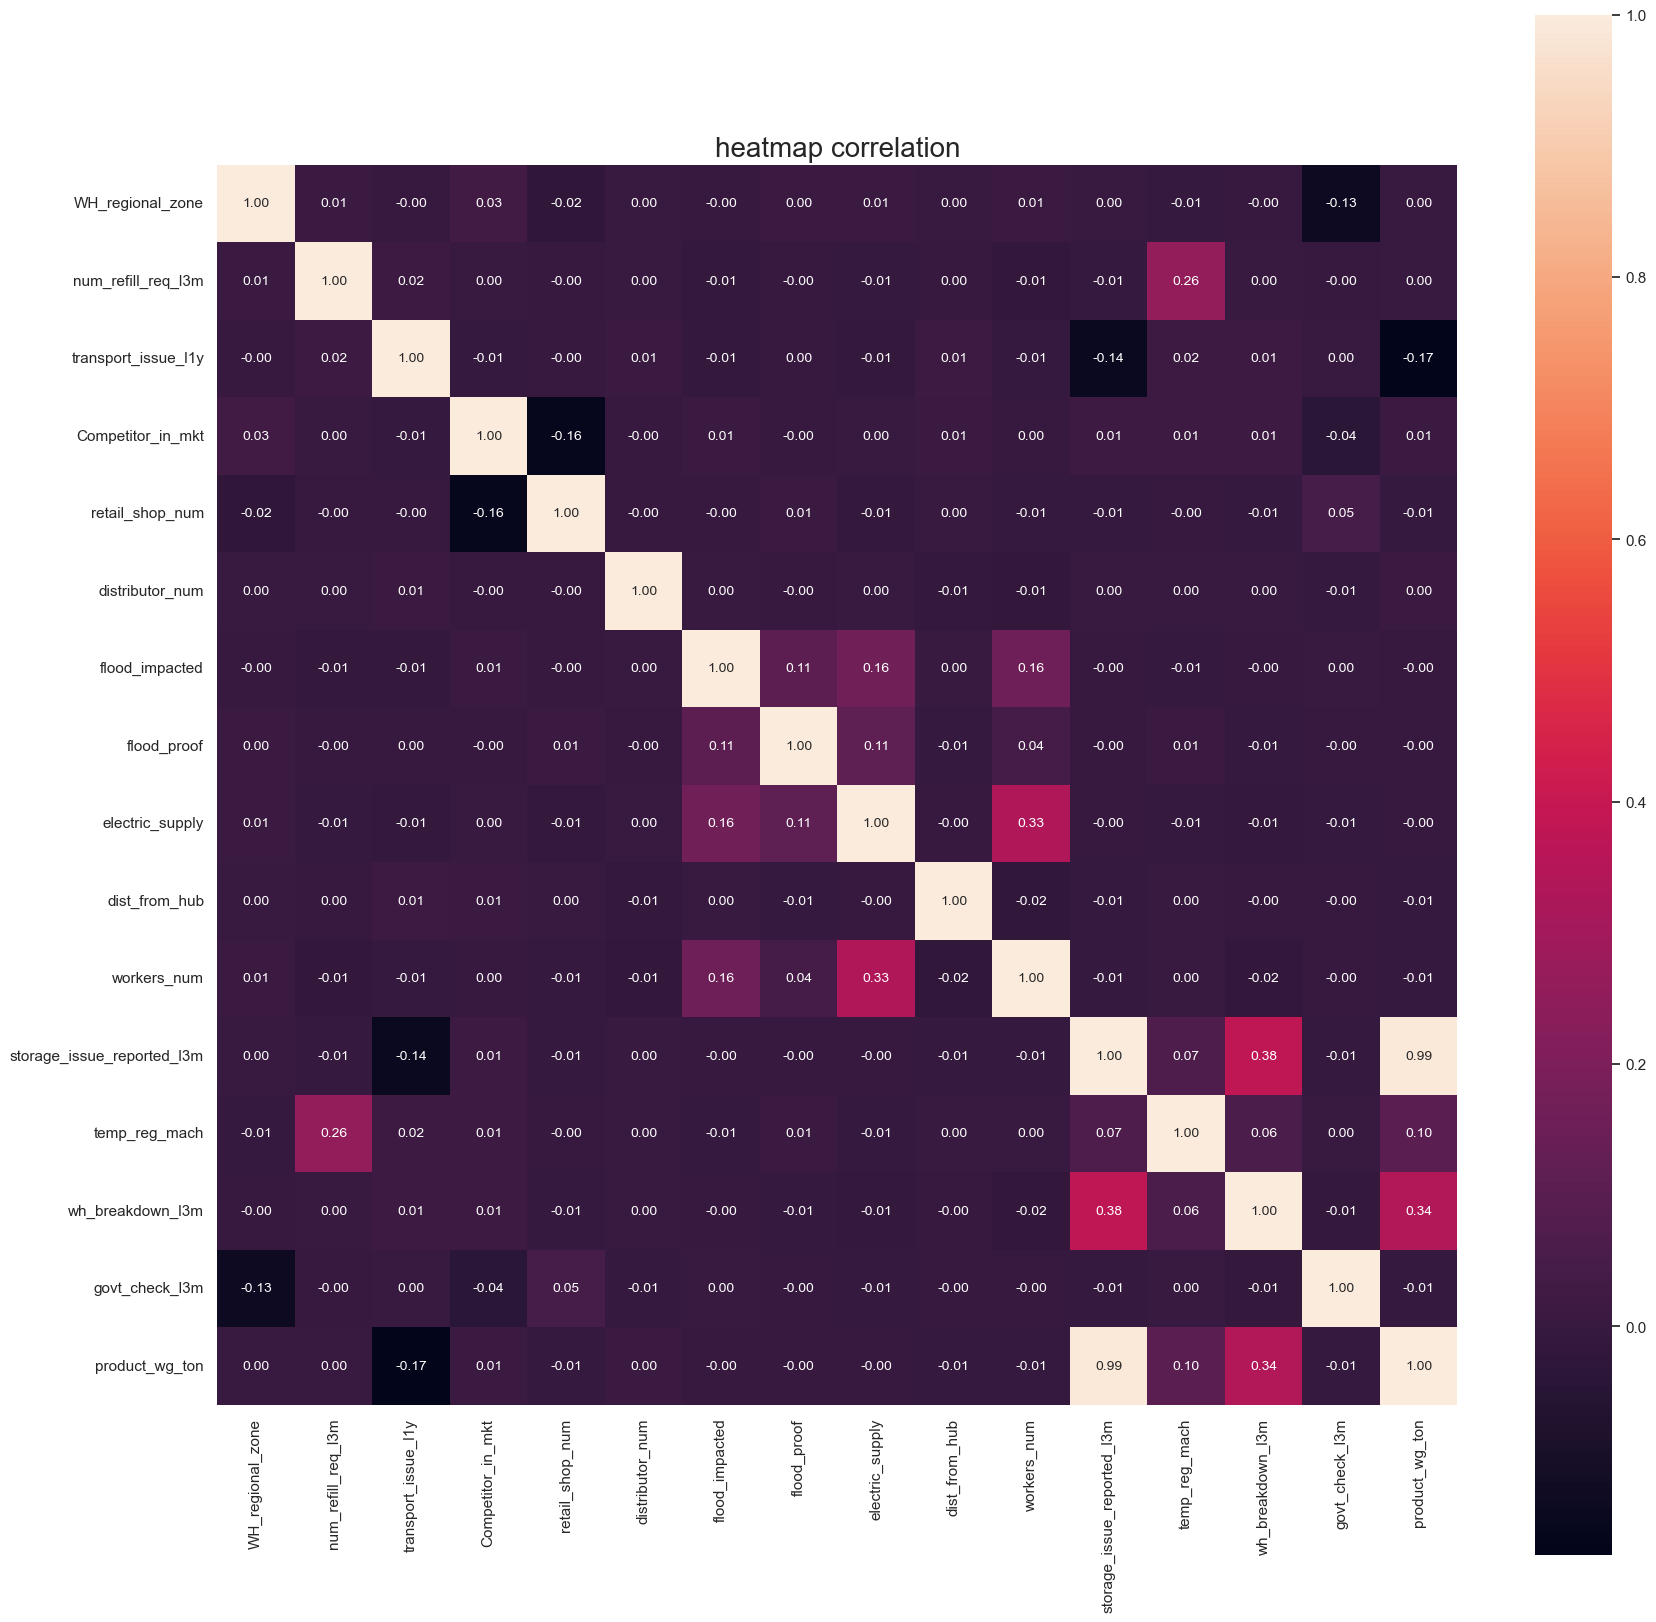

In [280]:
plt.figure(figsize=(20,20))
ax=sns.heatmap(data.corr(),cbar=True,annot=True,square=True,fmt='.2f' ,annot_kws={'size':10})
plt.title('heatmap correlation',fontsize=20,fontweight=100)
plt.show()

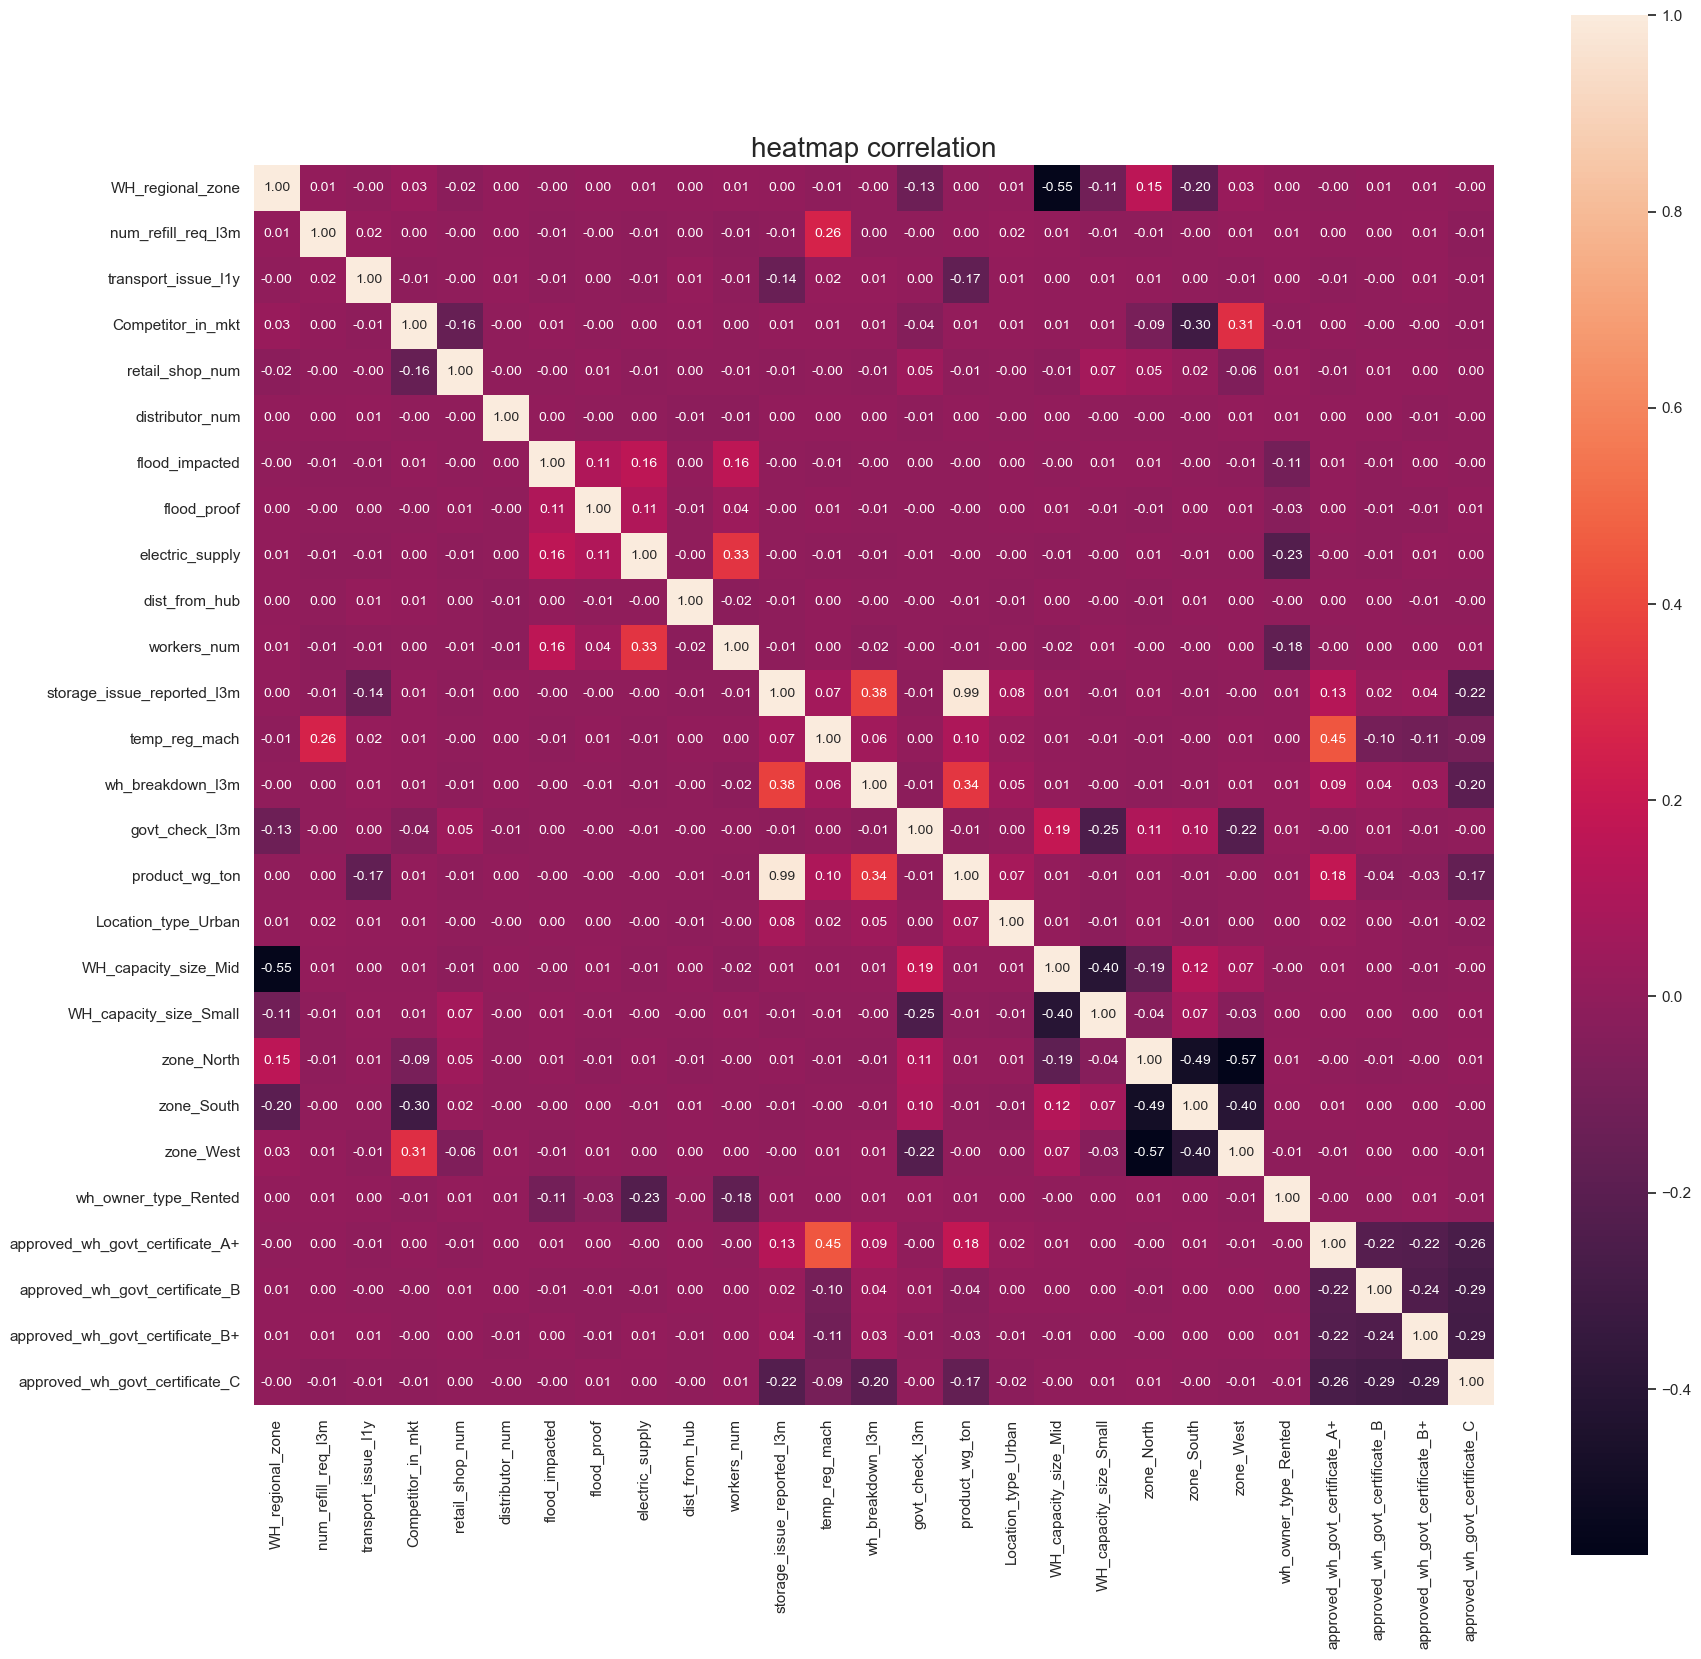

In [281]:
plt.figure(figsize=(20,20))
ax=sns.heatmap(data1.corr(),cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10})
plt.title('heatmap correlation',fontsize=20,fontweight=100)
plt.show()

In [282]:
#feature scaling

In [210]:
data1.describe()

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.251840,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,17.130440,0.303280,3.482040,18.812280,22102.632920,0.081720,0.40080,0.192440,0.411120,0.254480,0.317240,0.456880,0.167640,0.192480,0.196680,0.256360
std,1.668283,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.715077,9.161108,0.459684,1.690335,8.632382,11607.755077,0.273943,0.49007,0.394225,0.492047,0.435577,0.465411,0.498147,0.373554,0.394256,0.397496,0.436632
min,1.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,0.000000,0.000000,0.000000,1.000000,2065.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,10.000000,0.000000,2.000000,11.000000,13059.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,18.000000,0.000000,3.000000,21.000000,22101.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,24.000000,1.000000,5.000000,26.000000,30103.000000,0.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,6.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,39.000000,1.000000,6.000000,32.000000,55151.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [283]:
#Production Increases Storage issue increases

Text(0.5, 1.0, 'Storage Issue Vs Production')

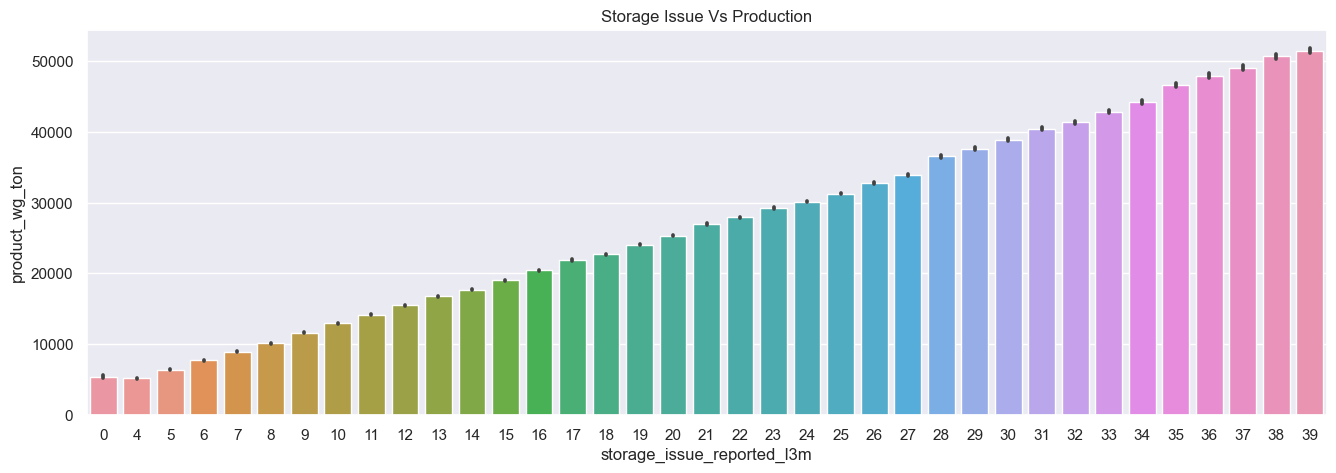

In [284]:
plt.figure(figsize=(16,5))
sns.barplot(x='storage_issue_reported_l3m' , y='product_wg_ton',data=data1)
plt.title('Storage Issue Vs Production')

Text(0.5, 1.0, 'Breakdown Vs Production')

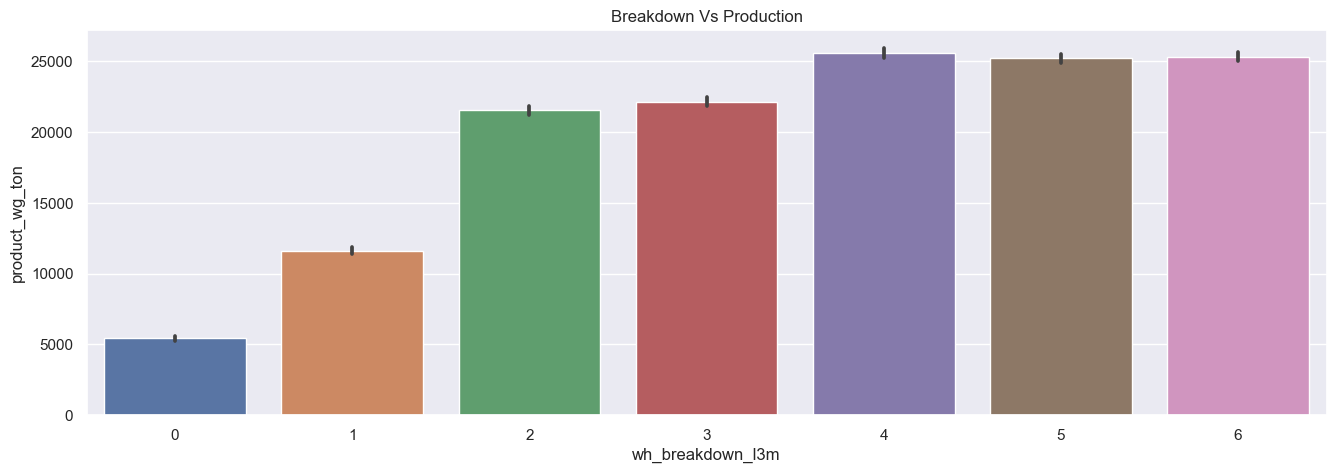

In [285]:
plt.figure(figsize=(16,5))
sns.barplot(x='wh_breakdown_l3m' , y='product_wg_ton',data=data1)
plt.title('Breakdown Vs Production')

Text(0.5, 1.0, 'Transport Issues Vs Production')

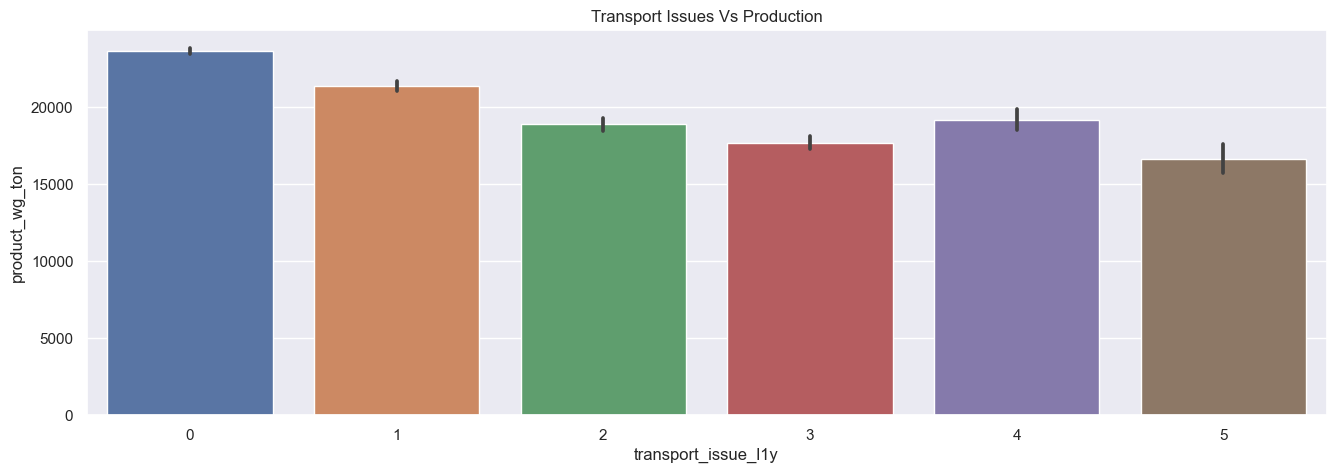

In [286]:
plt.figure(figsize=(16,5))
sns.barplot(x='transport_issue_l1y' , y='product_wg_ton',data=data1)
plt.title('Transport Issues Vs Production')

Text(0.5, 1.0, 'Temperature Regulation Vs Production')

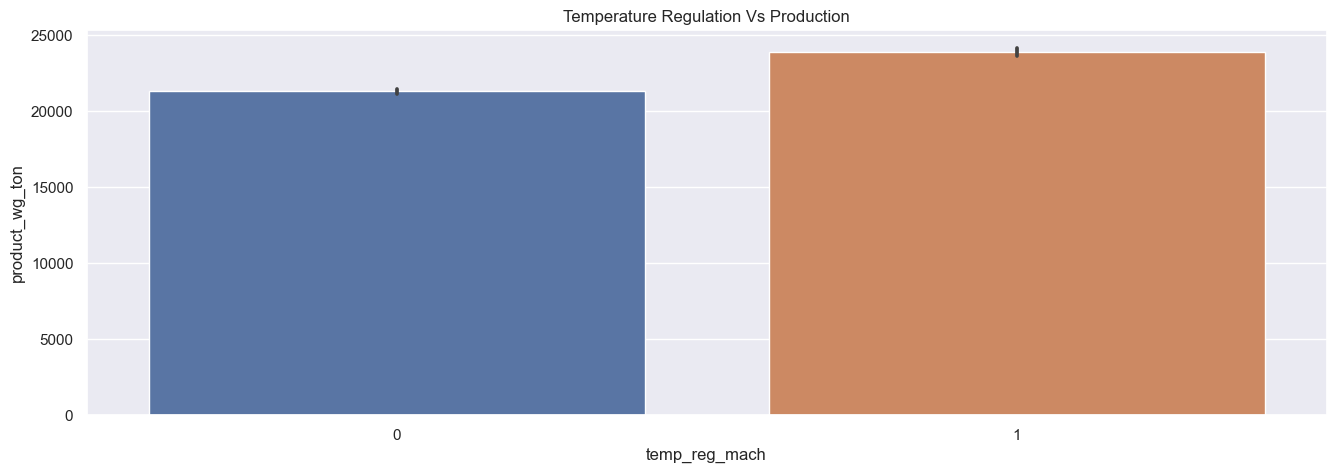

In [287]:
plt.figure(figsize=(16,5))
sns.barplot(x='temp_reg_mach' , y='product_wg_ton',data=data1)
plt.title('Temperature Regulation Vs Production')

# Spliting the data into train and test

In [288]:
x=data1.drop(['product_wg_ton'],axis=1)

In [289]:
x.isnull().sum()

WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                        0
storage_issue_reported_l3m         0
temp_reg_mach                      0
wh_breakdown_l3m                   0
govt_check_l3m                     0
Location_type_Urban                0
WH_capacity_size_Mid               0
WH_capacity_size_Small             0
zone_North                         0
zone_South                         0
zone_West                          0
wh_owner_type_Rented               0
approved_wh_govt_certificate_A+    0
approved_wh_govt_certificate_B     0
approved_wh_govt_certificate_B+    0
approved_wh_govt_certificate_C     0
dtype: int64

In [294]:
y=data1['product_wg_ton']
y.head()

0    17115
1     5074
2    23137
3    22115
4    24071
Name: product_wg_ton, dtype: int64

In [295]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [296]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [297]:
y_train

9868     28076
1517     36120
10013    24146
13553    52117
19039    35088
         ...  
5695     31151
8006     46126
17745     7149
17931    18088
13151    24133
Name: product_wg_ton, Length: 17500, dtype: int64

# Evaluate the model

# Linear Regression

In [298]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)


LinearRegression()

In [299]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn import metrics

In [300]:
y_pred_train =model_lr.predict(x_train)
y_pred_test = model_lr.predict(x_test)

In [301]:
print("LINEAR REGRESSION")
print()
print("Model performance for Training ")

print("Root Mean Squared Error : {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))))
print("Mean Absolute Error     : {:.4f}".format(metrics.mean_absolute_error(y_train, y_pred_train)))
print("R2 Score                : {:.4f}".format(r2_score(y_train,y_pred_train)))
print()
print("Model performance for Test ")
print("Root Mean Squared Error : {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))))
print("Mean Absolute Error     : {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_test)))
print("R2 Score                : {:.4f}".format(r2_score(y_test,y_pred_test)))

LINEAR REGRESSION

Model performance for Training 
Root Mean Squared Error : 1390.8481
Mean Absolute Error     : 1009.2899
R2 Score                : 0.9856

Model performance for Test 
Root Mean Squared Error : 1390.4951
Mean Absolute Error     : 1010.1646
R2 Score                : 0.9857


# Decision Tree

In [302]:
from sklearn.tree import DecisionTreeRegressor

In [303]:
model_dtree = DecisionTreeRegressor()
model_dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [304]:
y_pred_train_df = model_dtree.predict(x_train)
y_pred_test_df = model_dtree.predict(x_test)

In [305]:
print("DECISION TREE")
print()
print("Model performance for Training ")

print("Root Mean Squared Error : ",np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_df)))
print("Mean Absolute Error     : ",metrics.mean_absolute_error(y_train, y_pred_train_df))
print("R2 Score                : ",r2_score(y_train,y_pred_train_df))
print()
print("Model performance for Test ")
print("Root Mean Squared Error : {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_df))))
print("Mean Absolute Error     : {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_test_df)))
print("R2 Score                : {:.4f}".format(r2_score(y_test,y_pred_test_df)))


DECISION TREE

Model performance for Training 
Root Mean Squared Error :  0.0
Mean Absolute Error     :  0.0
R2 Score                :  1.0

Model performance for Test 
Root Mean Squared Error : 1296.0416
Mean Absolute Error     : 874.9948
R2 Score                : 0.9876


# Random Forest

In [306]:
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor()
model_rf.fit(x_train,y_train)


RandomForestRegressor()

In [307]:
y_train_pred_rf=model_rf.predict(x_train)
y_test_pred_rf=model_rf.predict(x_test)

In [308]:
print("RANDOM FOREST")
print()
print("Model performance for Training ")

print("Root Mean Squared Error : {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_rf))))
print("Mean Absolute Error     : {:.4f}".format(metrics.mean_absolute_error(y_train, y_train_pred_rf)))
print("R2 Score                : {:.4f}".format(r2_score(y_train,y_train_pred_rf)))
print()
print("Model performance for Test ")
print("Root Mean Squared Error : {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rf))))
print("Mean Absolute Error     : {:.4f}".format(metrics.mean_absolute_error(y_test, y_test_pred_rf)))
print("R2 Score                : {:.4f}".format(r2_score(y_test,y_test_pred_rf)))


RANDOM FOREST

Model performance for Training 
Root Mean Squared Error : 360.1305
Mean Absolute Error     : 262.8494
R2 Score                : 0.9990

Model performance for Test 
Root Mean Squared Error : 952.2430
Mean Absolute Error     : 706.8877
R2 Score                : 0.9933


In [309]:
RandomForest_r2Score= r2_score(y_test, y_test_pred_rf)


# Results

In [310]:
list1 = ["LINEAR REGRESSION","DECISION TREE","RANDOM FOREST"]
list2 = [ LinearRegression_r2Score,DecisionTree_r2Score,RandomForest_r2Score]
Result = pd.DataFrame({'MODEL':list1, "R2 SCORE":list2})
print(Result)

               MODEL  R2 SCORE
0  LINEAR REGRESSION  0.985724
1      DECISION TREE  0.985724
2      RANDOM FOREST  0.993305


Axes(0.125,0.11;0.775x0.77)


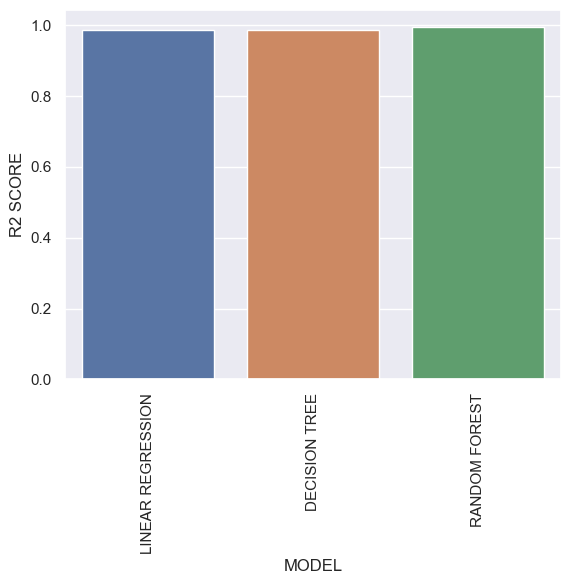

In [311]:
chart = sns.barplot(x='MODEL', y='R2 SCORE', data= Result)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

# Conclusion

## I conclude Random Forest Algorithm gives the best result as both train and test scores are not much deviating and also the r2 score is good
